<center>
    COMP4600/5500 - Reinforcement Learning

# Homework 5 - Temporal Difference

### Due: Monday, October 18th 11:59 pm
    
</center>

Student Name: ______________________ 

The purpose of this project is to study different properties of Temporal Difference methods.  

In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt


## Part I
The following Windy Gridworld includes a crosswind running upward through the middle of the grid. The strength of wind is shown under each column that you should use for shifting. The goal is to reach the goal state G from the start state S. This is an undiscounted episodic task, with constant rewards of -1 until the goal state is reached.
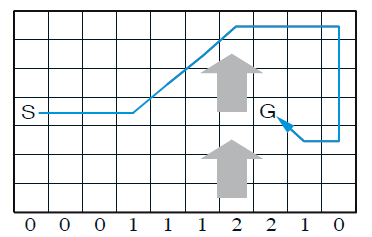


## Part I
Implement SARSA (on-policy TD control) using $\varepsilon$–greedy policy with parameters $\varepsilon=0.1, \alpha=0.5$, and $Q_0 (s,a)=0$ for all $s,a$. Apply your implementation to the windy gridworld in the following scenarios:


**(a)** In this scenario, the agent’s action set includes four moves (i.e. Up, Down, Right, Left). Plot the number of episodes vs. time steps (similar to graph in page 130). Then calculate the average episode length. 

**(b)** In this scenario, the agent has access to King’s moves (eight actions). You need to define a new action set and re-run the experiment in previous scenario. Plot the number of episodes vs. time steps. Then calculate the average episode length.

**(c)** In this scenario, you need to add a ninth action that causes no movement at all other than that caused by the wind. Plot the number of episodes vs. time steps. Then calculate the average episode length.

**(d)** In this scenario, the agent has access to King’s moves (eight actions). Assume that the effect of the wind, if there is any, is stochastic, sometimes varying by 1 from the mean values given for each column. That is, a third of the time you move exactly according to these values, as in the previous part, but also a third of the time you move one cell above that, and another third of the time you move one cell below that. For example, if you are one cell above the goal, one-third of the time you move two cells above the goal, and one-third of the time you move to the goal. Plot the number of episodes vs. time steps. Then calculate the average episode length.

**Note:** all four plots should be shown in one figure for comparison.



In [2]:
def all_states():
    states = []
    
    for height in range(7):
        for widsith in range(10):
            states.append((height,widsith))
    return states

In [3]:
print(all_states())

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9)]


In [4]:
def transition(state, action):
    
    wind = 0
               
    if state[1] == 3 or state[1] == 4 or state[1] == 5 or state[1] == 8:
        wind = 1
    
    elif state[1] == 6 or state[1] == 7:
        wind = 2
               
    if action == 0:
        y = max(state[0], state[0]+1+wind)
        
        if y > 6:
            y = 6
            
        x = state[1]
    
    elif action == 1:
        y = min(state[0], state[0]-1+wind)
        
        if y < 0:
            y = 0
            
        x = state[1]
    
    elif action == 2:
        x = max(state[1], state[1]+1+wind)
        
        if x > 9:
            x = 9
            
        y = state[0]
    
    elif action == 3:
        x = min(state[1], state[1]-1+wind)
        
        if x < 0:
            x = 0
            
        y = state[0]
    
    new_state = (y,x)
    
    return new_state

In [5]:
def epsilon_greedy(q, state, e, num_actions):
    
    p = np.random.rand()
    
    if (p < e):
        next_action = np.random.choice(range(num_actions))
       
        next_state = transition(state, next_action)
    
        
    else:
        next_action = max_q(q, state)
        next_state = transition(state, next_action)
        
    return next_state,next_action

In [6]:
def max_q(q, state):
        max_q = -100000
        max_action = 0
        pick_option = []
        pick_action = []
        
        for a,q in q[state].items():
            
            if q >= max_q:
                max_q = q
                max_action = a
                max_val = (max_q,max_action)
                pick_option.append(max_val)
        
        print(pick_option)
        for i in range(len(pick_option)):
            
            if pick_option[i][0] == max_q:
                pick_action.append(pick_option[i][1])
        
        action = np.random.choice(pick_action)
        return action


In [11]:
def sarsa(num_actions):
    e = 0.1
    alpha = 0.5
    
    states = all_states()

    start = (3,0)
    terminal = (3,7)
    
    
    q = {}
    for s in states:
        q[s] = {}
        for a in range(num_actions):
            q[s][a] = 0
            
    timesteps = []
    
    for episodes in range(1):
        reward = -1
        
        s = start
        state_history = []
        reward_history = []
        
        while s != terminal:
#             print(s, terminal)
#             print(s == terminal)
            
            next_state, next_action = epsilon_greedy(q, s, e, num_actions)
            state_history.append(next_state)
            
            if next_state == terminal:
                reward = 1
            
            q[s][a] += alpha * (reward + q[next_state][next_action] - q[s][a])
            
            reward_history.append(reward)
            
            s = next_state
            a = next_action
            
        total_steps = len(state_history)
        timesteps.append(total_steps)
        
    return timesteps
        
    

In [12]:
sarsa(4)

[(0, 0), (0, 1), (0, 2), (0, 3)]
[(0, 0), (0, 1), (0, 2), (0, 3)]
[(0, 0), (0, 1), (0, 2)]
[(-0.5, 0), (0, 1), (0, 2), (0, 3)]
[(0, 0), (0, 2)]
[(-1.125, 0), (0, 1), (0, 2), (0, 3)]
[(0, 0), (0, 1), (0, 2), (0, 3)]
[(0, 0), (0, 1), (0, 2), (0, 3)]
[(0, 0), (0, 1), (0, 2), (0, 3)]
[(0, 0), (0, 1), (0, 2), (0, 3)]
[(-0.5, 0), (0, 1), (0, 2), (0, 3)]
[(0, 0), (0, 1), (0, 3)]
[(0, 0), (0, 1), (0, 2), (0, 3)]
[(-0.5, 0), (0, 1), (0, 3)]
[(-0.5, 0), (0, 1), (0, 2)]
[(-0.5, 0), (0, 1), (0, 2), (0, 3)]
[(0, 0), (0, 1), (0, 2), (0, 3)]
[(0, 0), (0, 1), (0, 2), (0, 3)]
[(-0.5, 0), (0, 1), (0, 2), (0, 3)]
[(0, 0), (0, 1), (0, 2)]
[(0, 0), (0, 2)]
[(-0.5, 0), (-0.5, 1), (0, 2), (0, 3)]
[(0, 0), (0, 2), (0, 3)]
[(-1.125, 0), (0, 1), (0, 3)]
[(-0.5, 0), (0, 1), (0, 2)]
[(-0.5, 0), (-0.5, 1), (-0.5, 2), (0, 3)]
[(0, 0), (0, 2)]
[(-0.5, 0), (-0.5, 2), (0, 3)]
[(0, 0), (0, 2)]
[(-1.0625, 0), (0, 1), (0, 2), (0, 3)]
[(-1.0625, 0), (0, 1), (0, 2)]
[(0, 0), (0, 3)]
[(-0.5, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-

[(-131.17717232418102, 0), (0, 1), (0, 3)]
[(-149.722643165628, 0), (-75.39154112751112, 1), (0, 2)]
[(-131.17717232418102, 0), (0, 1), (0, 3)]
[(-149.722643165628, 0), (-75.39154112751112, 1), (0, 2)]
[(-131.17717232418102, 0), (0, 1), (0, 3)]
[(-100.48174979220394, 0), (-96.45525987026147, 1), (0, 3)]
[(0, 0), (0, 2)]
[(-100.48174979220394, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-100.48174979220394, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-100.48174979220394, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-100.48174979220394, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-149.722643165628, 0), (-75.39154112751112, 1), (0, 2)]
[(-131.17717232418102, 0), (0, 1), (0, 3)]
[(-137.42080826679654, 0), (-75.39154112751112, 1), (0, 2)]
[(-131.17717232418102, 0), (0, 1), (0, 3)]
[(-137.42080826679654, 0), (-75.39154112751112, 1), (0, 2)]
[(-131.17717232418102, 0), (0, 1), (0, 3)]
[(-137.42080826679654, 0), (-75.39154112751112, 1), (0, 2)]
[(-131.17717232418102, 0), (0, 1), (0, 3)]
[(-137.42080826679654, 0), (-75.39154112751112, 1), (0, 2)]


[(-264.969293936211, 0), (-248.40185731610688, 1), (0, 2)]
[(-262.6882324710858, 0), (0, 1), (0, 3)]
[(-261.13996123216043, 0), (-249.76844929608745, 1), (0, 3)]
[(0, 0), (0, 2)]
[(-265.14966251331975, 0), (-248.40185731610688, 1), (0, 2)]
[(-262.6882324710858, 0), (0, 1), (0, 3)]
[(-261.8494513532889, 0), (-248.40185731610688, 1), (0, 2)]
[(-262.6882324710858, 0), (0, 1), (0, 3)]
[(-261.13996123216043, 0), (-257.8528813895345, 1), (0, 3)]
[(0, 0), (0, 2)]
[(-261.13996123216043, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-261.8494513532889, 0), (-248.40185731610688, 1), (0, 2)]
[(-262.6882324710858, 0), (0, 1), (0, 3)]
[(-261.13996123216043, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-261.6931042302415, 0), (-248.40185731610688, 1), (0, 2)]
[(-262.6882324710858, 0), (0, 1), (0, 3)]
[(-262.2802875653799, 0), (-248.40185731610688, 1), (0, 2)]
[(-262.6882324710858, 0), (0, 1), (0, 3)]
[(-261.13996123216043, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-262.2802875653799, 0), (-248.40185731610688, 1), (0, 2)]
[(-262.6882324710

[(-411.7478888624045, 0), (-403.760769515138, 2), (0, 3)]
[(0, 0), (0, 2)]
[(-411.7478888624045, 0), (-403.760769515138, 2), (0, 3)]
[(0, 0), (0, 2)]
[(0, 0), (0, 2)]
[(-420.50731452809725, 0), (-395.8658744005031, 1), (0, 2)]
[(-416.679133045972, 0), (0, 1), (0, 3)]
[(-411.7478888624045, 0), (-410.45747926662784, 2), (0, 3)]
[(0, 0), (0, 2)]
[(-411.7478888624045, 0), (-410.45747926662784, 2), (0, 3)]
[(-411.7478888624045, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-411.7478888624045, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-419.36137289158773, 0), (-395.8658744005031, 1), (0, 2)]
[(-416.679133045972, 0), (0, 1), (0, 3)]
[(-419.62280952568887, 0), (-395.8658744005031, 1), (0, 2)]
[(-416.679133045972, 0), (0, 1), (0, 3)]
[(-419.62280952568887, 0), (-395.8658744005031, 1), (0, 2)]
[(-416.679133045972, 0), (0, 1), (0, 3)]
[(0, 0), (0, 2)]
[(-419.62280952568887, 0), (-395.8658744005031, 1), (0, 2)]
[(-416.679133045972, 0), (0, 1), (0, 3)]
[(-411.7478888624045, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-408.6278749676741,

[(-578.0263796217248, 0), (0, 1), (0, 3)]
[(-598.3369642547264, 0), (-582.447030255611, 1), (0, 2)]
[(-578.0263796217248, 0), (0, 1), (0, 3)]
[(-471.688675483126, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-471.688675483126, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-598.3369642547264, 0), (-582.447030255611, 1), (0, 2)]
[(-578.0263796217248, 0), (0, 1), (0, 3)]
[(-598.9448954135734, 0), (-582.447030255611, 1), (0, 2)]
[(-578.0263796217248, 0), (0, 1), (0, 3)]
[(-598.9448954135734, 0), (-582.447030255611, 1), (0, 2)]
[(-578.0263796217248, 0), (0, 1), (0, 3)]
[(-598.9448954135734, 0), (-582.447030255611, 1), (0, 2)]
[(-578.0263796217248, 0), (0, 1), (0, 3)]
[(-471.688675483126, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-598.9448954135734, 0), (-582.447030255611, 1), (0, 2)]
[(-578.0263796217248, 0), (0, 1), (0, 3)]
[(-471.688675483126, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-471.688675483126, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-598.7241841419348, 0), (-582.447030255611, 1), (0, 2)]
[(-578.0263796217248, 0), (0, 1), (0, 3)]
[(-597.5

[(-471.688675483126, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-728.6014731137928, 0), (-725.6017695585272, 1), (0, 2)]
[(-725.4485478467858, 0), (0, 1), (0, 3)]
[(-471.688675483126, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-471.688675483126, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-730.1110104893357, 0), (-725.6017695585272, 1), (0, 2)]
[(-725.4485478467858, 0), (0, 1), (0, 3)]
[(-471.688675483126, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-730.7009906879193, 0), (-725.6017695585272, 1), (0, 2)]
[(-725.4485478467858, 0), (0, 1), (0, 3)]
[(-471.688675483126, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-730.3985368772069, 0), (-725.6017695585272, 1), (0, 2)]
[(-725.4485478467858, 0), (0, 1), (0, 3)]
[(-729.8705639879437, 0), (-725.6017695585272, 1), (0, 2)]
[(-725.4485478467858, 0), (0, 1), (0, 3)]
[(-729.8705639879437, 0), (-725.6017695585272, 1), (0, 2)]
[(-725.4485478467858, 0), (0, 1), (0, 3)]
[(-471.688675483126, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-471.688675483126, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-729.8705639879437, 0), (-725.601769558527

[(-218.04180072649683, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-218.04180072649683, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-809.8520652535557, 0), (-795.3261990014837, 1), (0, 2)]
[(-805.8084735610663, 0), (0, 1), (0, 3)]
[(-810.7835332935322, 0), (-795.3261990014837, 1), (0, 2)]
[(-805.8084735610663, 0), (0, 1), (0, 3)]
[(-717.9773128385442, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-810.7835332935322, 0), (-803.9006124815519, 1), (0, 2)]
[(-805.8084735610663, 0), (0, 1), (0, 3)]
[(-717.9773128385442, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-805.5801035151056, 0), (-803.9006124815519, 1), (0, 2)]
[(-805.8084735610663, 0), (0, 1), (0, 3)]
[(-717.9773128385442, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-717.9773128385442, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-717.9773128385442, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-802.9163378062467, 0), (0, 2)]
[(-805.8084735610663, 0), (0, 1), (0, 3)]
[(-803.2100052783564, 0), (0, 2)]
[(-805.8084735610663, 0), (0, 1), (0, 3)]
[(-717.9773128385442, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-803.2100052783564, 0), (0, 2)]


[(-870.4812815012278, 0), (0, 1), (0, 3)]
[(-840.5735167493251, 0), (0, 3)]
[(-618.974472124269, 0), (0, 2)]
[(-840.5735167493251, 0), (0, 3)]
[(-840.5735167493251, 0), (0, 3)]
[(-618.974472124269, 0), (0, 2)]
[(-840.5735167493251, 0), (0, 3)]
[(-618.974472124269, 0), (0, 2)]
[(-840.5735167493251, 0), (0, 3)]
[(-618.974472124269, 0), (0, 2)]
[(-840.5735167493251, 0), (0, 3)]
[(-618.974472124269, 0), (0, 2)]
[(-840.5735167493251, 0), (0, 3)]
[(-618.974472124269, 0), (0, 2)]
[(-840.5735167493251, 0), (0, 3)]
[(-618.974472124269, 0), (0, 2)]
[(-840.5735167493251, 0), (0, 3)]
[(-618.974472124269, 0), (0, 2)]
[(-870.4812815012278, 0), (0, 1), (0, 3)]
[(-882.088901919051, 0), (-864.3062948790729, 1), (0, 2)]
[(-840.5735167493251, 0), (0, 3)]
[(-618.974472124269, 0), (0, 2)]
[(-840.5735167493251, 0), (0, 3)]
[(-618.974472124269, 0), (0, 2)]
[(-840.5735167493251, 0), (0, 3)]
[(-618.974472124269, 0), (0, 2)]
[(-840.5735167493251, 0), (0, 3)]
[(-618.974472124269, 0), (0, 2)]
[(-840.5735167493251

[(-846.9047237190994, 0), (0, 2)]
[(-858.2603625276914, 0), (0, 3)]
[(-846.9047237190994, 0), (0, 2)]
[(-858.2603625276914, 0), (0, 3)]
[(-846.9047237190994, 0), (0, 2)]
[(-858.2603625276914, 0), (0, 3)]
[(-846.9047237190994, 0), (0, 2)]
[(-858.2603625276914, 0), (0, 3)]
[(-858.2603625276914, 0), (0, 3)]
[(-846.9047237190994, 0), (0, 2)]
[(-858.2603625276914, 0), (0, 3)]
[(-846.9047237190994, 0), (0, 2)]
[(-858.2603625276914, 0), (0, 3)]
[(-846.9047237190994, 0), (0, 2)]
[(-858.2603625276914, 0), (0, 3)]
[(-846.9047237190994, 0), (0, 2)]
[(-858.2603625276914, 0), (0, 3)]
[(-846.9047237190994, 0), (0, 2)]
[(-846.9047237190994, 0), (0, 2)]
[(-858.2603625276914, 0), (0, 3)]
[(-846.9047237190994, 0), (0, 2)]
[(-858.2603625276914, 0), (0, 3)]
[(-846.9047237190994, 0), (0, 2)]
[(-858.2603625276914, 0), (0, 3)]
[(-846.9047237190994, 0), (0, 2)]
[(-846.9047237190994, 0), (0, 2)]
[(-858.2603625276914, 0), (0, 3)]
[(-858.2603625276914, 0), (0, 3)]
[(-846.9047237190994, 0), (0, 2)]
[(-858.2603625

[(-985.4081685639151, 0), (-974.121742973337, 1), (0, 2)]
[(-992.2332737582462, 0), (0, 1), (0, 3)]
[(-932.4925492495004, 0), (0, 3)]
[(-929.4481652316035, 0), (0, 2)]
[(-932.4925492495004, 0), (0, 3)]
[(-929.4481652316035, 0), (0, 2)]
[(-932.4925492495004, 0), (0, 3)]
[(-929.4481652316035, 0), (0, 2)]
[(-932.4925492495004, 0), (0, 3)]
[(-929.4481652316035, 0), (0, 2)]
[(-932.4925492495004, 0), (0, 3)]
[(-929.4481652316035, 0), (0, 2)]
[(-929.4481652316035, 0), (0, 2)]
[(-932.4925492495004, 0), (0, 3)]
[(-929.4481652316035, 0), (0, 2)]
[(-932.4925492495004, 0), (0, 3)]
[(-932.4925492495004, 0), (0, 3)]
[(-929.4481652316035, 0), (0, 2)]
[(-932.4925492495004, 0), (0, 3)]
[(-929.4481652316035, 0), (0, 2)]
[(-932.4925492495004, 0), (0, 3)]
[(-929.4481652316035, 0), (0, 2)]
[(-932.4925492495004, 0), (0, 3)]
[(-929.4481652316035, 0), (0, 2)]
[(-932.4925492495004, 0), (0, 3)]
[(-929.4481652316035, 0), (0, 2)]
[(-932.4925492495004, 0), (0, 3)]
[(-929.4481652316035, 0), (0, 2)]
[(-992.233273758

[(-1017.2575090563644, 0), (0, 2)]
[(-1033.9172446589153, 0), (0, 3)]
[(-1017.2575090563644, 0), (0, 2)]
[(-1033.9172446589153, 0), (0, 3)]
[(-1017.2575090563644, 0), (0, 2)]
[(-1033.9172446589153, 0), (0, 3)]
[(-1017.2575090563644, 0), (0, 2)]
[(-1033.9172446589153, 0), (0, 3)]
[(-1017.2575090563644, 0), (0, 2)]
[(-1033.9172446589153, 0), (0, 3)]
[(-1017.2575090563644, 0), (0, 2)]
[(-1033.9172446589153, 0), (0, 3)]
[(-1017.2575090563644, 0), (0, 2)]
[(-1033.9172446589153, 0), (0, 3)]
[(-1017.2575090563644, 0), (0, 2)]
[(-1033.9172446589153, 0), (0, 3)]
[(-1017.2575090563644, 0), (0, 2)]
[(-1017.2575090563644, 0), (0, 2)]
[(-1033.9172446589153, 0), (0, 3)]
[(-1017.2575090563644, 0), (0, 2)]
[(-1033.9172446589153, 0), (0, 3)]
[(-1017.2575090563644, 0), (0, 2)]
[(-1033.9172446589153, 0), (0, 3)]
[(-1096.9433345874354, 0), (-1077.378501691418, 1), (0, 2)]
[(-1097.6885041700066, 0), (0, 1), (0, 3)]
[(-1033.9172446589153, 0), (0, 3)]
[(-1017.2575090563644, 0), (0, 2)]
[(-1033.9172446589153,

[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-683.8277153744993, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-683.8277153744993, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-1182.898827673699, 0), (-1148.4888501195558, 1), (0, 2)]
[(-1179.5228513106738, 0), (-1148.4888501195558, 1), (0, 2)]
[(-1171.429404399892, 0), (0, 1), (0, 3)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.241

[(-1113.540749835387, 0), (0, 3)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1324.8227393941468, 0), (0, 1), (0, 3)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1331.6533840900042, 0), (-1283.6778433885652, 1), (0, 2)]
[(-1328.2101249938066, 0), (0, 1), (0, 3)]
[(-1113.540749835387, 0), (0, 3)]
[(-1074.2416353456556, 0), (0, 2)]
[(-1113.540749835387, 0),

[(-1358.5079314879044, 0), (0, 2)]
[(-1257.735773274893, 0), (0, 3)]
[(-1358.5079314879044, 0), (0, 2)]
[(-1257.735773274893, 0), (0, 3)]
[(-1358.5079314879044, 0), (0, 2)]
[(-1257.735773274893, 0), (0, 3)]
[(-1358.5079314879044, 0), (0, 2)]
[(-1257.735773274893, 0), (0, 3)]
[(-1358.5079314879044, 0), (0, 2)]
[(-1257.735773274893, 0), (0, 3)]
[(-1358.5079314879044, 0), (0, 2)]
[(-1257.735773274893, 0), (0, 3)]
[(-1358.5079314879044, 0), (0, 2)]
[(-1257.735773274893, 0), (0, 3)]
[(-1358.5079314879044, 0), (0, 2)]
[(-1257.735773274893, 0), (0, 3)]
[(-1358.5079314879044, 0), (0, 2)]
[(-1257.735773274893, 0), (0, 3)]
[(-1358.5079314879044, 0), (0, 2)]
[(-1257.735773274893, 0), (0, 3)]
[(-1358.5079314879044, 0), (0, 2)]
[(-1390.3045260231415, 0), (0, 1), (0, 3)]
[(-1257.735773274893, 0), (0, 3)]
[(-1375.867155799579, 0), (0, 2)]
[(-1380.4761422309457, 0), (0, 1), (0, 3)]
[(-1368.3984151798495, 0), (0, 2)]
[(-1380.4761422309457, 0), (0, 1), (0, 3)]
[(-1368.3984151798495, 0), (0, 2)]
[(-1368.

[(-1386.0725965950046, 0), (0, 3)]
[(-1452.5393084151397, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1452.5393084151397, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1452.5393084151397, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1452.5393084151397, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1452.5393084151397, 0), (0, 2)]
[(-1496.0834620111555, 0), (0, 1), (0, 3)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1452.5393084151397, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1452.5393084151397, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1452.5393084151397, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1452.5393084151397, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1452.5393084151397, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1452.5393084151397, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1452.5393084151397, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1452.5393084151397, 0), (0, 2)]
[(-1502.7040814166633, 0), (0, 1), (0, 3)]
[(-1

[(-1386.0725965950046, 0), (0, 3)]
[(-1563.7107569480036, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1563.7107569480036, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1563.7107569480036, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1563.7107569480036, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1563.7107569480036, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1563.7107569480036, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1563.7107569480036, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1563.7107569480036, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1563.7107569480036, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1563.7107569480036, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1563.7107569480036, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1563.7107569480036, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1563.7107569480036, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1563.7107569480036, 0), (0, 2)]
[(-1386.072596595004

[(-1661.5755196979965, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1386.0725965950046, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1386.072596595004

[(-1657.269156573227, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1657.269156573227, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1657.269156573227, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1657.269156573227, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1657.269156573227, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1657.269156573227, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1657.269156573227, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1657.269156573227, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1657.269156573227, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1657.269156573227, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1657.269156573227, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1657.269156573227, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1657.269156573227, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1657.269156573227, 0), (0, 3)]
[(-1661.5755196979965, 0), (0, 2)]
[(-1657.269156573227, 0), (0, 3)]


[(-1907.544931172191, 0), (0, 3)]
[(-1820.0468415126747, 0), (0, 2)]
[(-1907.544931172191, 0), (0, 3)]
[(-1820.0468415126747, 0), (0, 2)]
[(-1907.544931172191, 0), (0, 3)]
[(-1820.0468415126747, 0), (0, 2)]
[(-1069.7745361121613, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-1926.0379716100263, 0), (-1907.8238571918437, 1), (0, 2)]
[(-1918.1598813854155, 0), (0, 1), (0, 3)]
[(-1927.2677028243902, 0), (-1907.8238571918437, 1), (0, 2)]
[(-1918.1598813854155, 0), (0, 1), (0, 3)]
[(-1907.544931172191, 0), (0, 3)]
[(-1820.0468415126747, 0), (0, 2)]
[(-1907.544931172191, 0), (0, 3)]
[(-1820.0468415126747, 0), (0, 2)]
[(-1907.544931172191, 0), (0, 3)]
[(-1820.0468415126747, 0), (0, 2)]
[(-1907.544931172191, 0), (0, 3)]
[(-1820.0468415126747, 0), (0, 2)]
[(-1907.544931172191, 0), (0, 3)]
[(-1820.0468415126747, 0), (0, 2)]
[(-1907.544931172191, 0), (0, 3)]
[(-1820.0468415126747, 0), (0, 2)]
[(-1907.544931172191, 0), (0, 3)]
[(-1820.0468415126747, 0), (0, 2)]
[(-1907.544931172191, 0), (0, 3)]
[(-1820.04684151

[(-1894.1275621957022, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-1894.1275621957022, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-1894.1275621957022, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-1894.1275621957022, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-1894.1275621957022, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-1894.1275621957022, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-1894.1275621957022, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-1894.1275621957022, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-1894.1275621957022, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-1894.1275621957022, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-1894.1275621957022, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-1894.1275621957022, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-1894.1275621957022, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-1894.1275621957022, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-1894.127562195702

[(-2127.007611808048, 0), (0, 1), (0, 3)]
[(-1971.6642736137308, 0), (0, 3)]
[(-2002.5875622908138, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-2002.5875622908138, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-2002.5875622908138, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-2002.5875622908138, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-2002.5875622908138, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-2002.5875622908138, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-2002.5875622908138, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-2002.5875622908138, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-2002.5875622908138, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-2002.5875622908138, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-2002.5875622908138, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-2002.5875622908138, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-2002.5875622908138, 0), (0, 2)]
[(-1971.6642736137308, 0), (0, 3)]
[(-2002.58756

[(-2111.0376472762637, 0), (0, 3)]
[(-2104.828428948381, 0), (0, 2)]
[(-2111.0376472762637, 0), (0, 3)]
[(-2104.828428948381, 0), (0, 2)]
[(-2111.0376472762637, 0), (0, 3)]
[(-2104.828428948381, 0), (0, 2)]
[(-2111.0376472762637, 0), (0, 3)]
[(-2104.828428948381, 0), (0, 2)]
[(-2111.0376472762637, 0), (0, 3)]
[(-2104.828428948381, 0), (0, 2)]
[(-2111.0376472762637, 0), (0, 3)]
[(-2104.828428948381, 0), (0, 2)]
[(-2111.0376472762637, 0), (0, 3)]
[(-2104.828428948381, 0), (0, 2)]
[(-2111.0376472762637, 0), (0, 3)]
[(-2104.828428948381, 0), (0, 2)]
[(-2111.0376472762637, 0), (0, 3)]
[(-2104.828428948381, 0), (0, 2)]
[(-2111.0376472762637, 0), (0, 3)]
[(-2104.828428948381, 0), (0, 2)]
[(-2111.0376472762637, 0), (0, 3)]
[(-2104.828428948381, 0), (0, 2)]
[(-2111.0376472762637, 0), (0, 3)]
[(-2104.828428948381, 0), (0, 2)]
[(-2104.828428948381, 0), (0, 2)]
[(-2111.0376472762637, 0), (0, 3)]
[(-2104.828428948381, 0), (0, 2)]
[(-2111.0376472762637, 0), (0, 3)]
[(-2104.828428948381, 0), (0, 2)]


[(-2214.0140080004803, 0), (0, 3)]
[(-2182.143888522692, 0), (0, 2)]
[(-2214.0140080004803, 0), (0, 3)]
[(-2182.143888522692, 0), (0, 2)]
[(-2214.0140080004803, 0), (0, 3)]
[(-2182.143888522692, 0), (0, 2)]
[(-2214.0140080004803, 0), (0, 3)]
[(-2182.143888522692, 0), (0, 2)]
[(-2214.0140080004803, 0), (0, 3)]
[(-2182.143888522692, 0), (0, 2)]
[(-2214.0140080004803, 0), (0, 3)]
[(-2182.143888522692, 0), (0, 2)]
[(-2214.0140080004803, 0), (0, 3)]
[(-2182.143888522692, 0), (0, 2)]
[(-2214.0140080004803, 0), (0, 3)]
[(-2182.143888522692, 0), (0, 2)]
[(-2182.143888522692, 0), (0, 2)]
[(-2214.0140080004803, 0), (0, 3)]
[(-2182.143888522692, 0), (0, 2)]
[(-2214.0140080004803, 0), (0, 3)]
[(-2182.143888522692, 0), (0, 2)]
[(-2214.0140080004803, 0), (0, 3)]
[(-2182.143888522692, 0), (0, 2)]
[(-2214.0140080004803, 0), (0, 3)]
[(-2182.143888522692, 0), (0, 2)]
[(-2214.0140080004803, 0), (0, 3)]
[(-2182.143888522692, 0), (0, 2)]
[(-2214.0140080004803, 0), (0, 3)]
[(-2182.143888522692, 0), (0, 2)]


[(-2419.208141446743, 0), (-2417.7370710575246, 1), (0, 3)]
[(-2234.6620635767695, 0), (0, 2)]
[(-2419.208141446743, 0), (-2417.7370710575246, 1), (0, 3)]
[(-2234.6620635767695, 0), (0, 2)]
[(-2419.208141446743, 0), (-2417.7370710575246, 1), (0, 3)]
[(-2234.6620635767695, 0), (0, 2)]
[(-2416.275189334766, 0), (0, 1), (0, 3)]
[(-2418.621603490211, 0), (-2349.769557696489, 1), (0, 2)]
[(-2417.994261611645, 0), (0, 1), (0, 3)]
[(-2419.208141446743, 0), (-2417.7370710575246, 1), (0, 3)]
[(-2234.6620635767695, 0), (0, 2)]
[(-2419.208141446743, 0), (0, 3)]
[(-2234.6620635767695, 0), (0, 2)]
[(-2419.208141446743, 0), (0, 3)]
[(-2234.6620635767695, 0), (0, 2)]
[(-2234.6620635767695, 0), (0, 2)]
[(-2419.208141446743, 0), (0, 3)]
[(-2234.6620635767695, 0), (0, 2)]
[(-2419.208141446743, 0), (0, 3)]
[(-2234.6620635767695, 0), (0, 2)]
[(-2419.208141446743, 0), (0, 3)]
[(-2234.6620635767695, 0), (0, 2)]
[(-2419.208141446743, 0), (0, 3)]
[(-2234.6620635767695, 0), (0, 2)]
[(-2419.208141446743, 0), (0

[(-2434.9042509800856, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2434.9042509800856, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2434.9042509800856, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2434.9042509800856, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2434.9042509800856, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2542.095026581911, 0), (-2516.2843584019265, 1), (0, 2)]
[(-2551.6206933065773, 0), (0, 1), (0, 3)]
[(-2545.420125048732, 0), (-2516.2843584019265, 1), (0, 2)]
[(-2551.6206933065773, 0), (0, 1), (0, 3)]
[(-2545.420125048732, 0), (-2516.2843584019265, 1), (0, 2)]
[(-2551.6206933065773, 0), (0, 1), (0, 3)]
[(-2545.420125048732, 0), (-2516.2843584019265, 1), (0, 2)]
[(-2551.6206933065773, 0), (0, 1), (0, 3)]
[(-2545.420125048732, 0), (-2516.2843584019265, 1), (0, 2)]
[(-2551.6206933065773, 0), (0, 1), (0, 3)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2434.9042509800856, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2434.9042509800856, 0), (0,

[(-2578.2303265126707, 0), (0, 1), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2453.4161559367626, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2459.0435062666666, 0), (0, 2)]
[(-1953.5705346406098, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-2580.2411236701523, 0), (-2

[(-2459.0435062666666, 0), (0, 2)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2635.9548728156774, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2635.9548728156774, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2635.9548728156774, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2635.9548728156774, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2635.9548728156774, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2635.9548728156774, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2635.9548728156774, 0), (0, 3)]
[(-2717.943593864116, 0), (-2700.4298763913293, 1), (0, 2)]
[(-2717.056017885696, 0), (0, 1), (0, 3)]
[(-2720.9773155349953, 0), (-2700.4298763913293, 1), (0, 2)]
[(-2717.056017885696, 0), (0, 1), (0, 3)]
[(-2635.9548728156774, 0), (0, 3)]
[(-2720.9773155349953, 0), (-2700.4298763913293, 1), (0, 2)]
[(-2717.056017885696, 0), (0, 1), (0, 3)]
[(-2635.9548728156774, 0), (0, 3)]
[(-2459.0435062666666, 0), (0, 2)]
[(-2635.9548728156774, 0), (0, 3)]
[(-2725.071322513916, 0), (

[(-2773.873330548803, 0), (0, 3)]
[(-2617.111772913526, 0), (0, 2)]
[(-2773.873330548803, 0), (0, 3)]
[(-2773.873330548803, 0), (0, 3)]
[(-2617.111772913526, 0), (0, 2)]
[(-2773.873330548803, 0), (0, 3)]
[(-2617.111772913526, 0), (0, 2)]
[(-2773.873330548803, 0), (0, 3)]
[(-2825.0454180577735, 0), (-2753.358700043542, 1), (0, 2)]
[(-2826.952829821954, 0), (0, 1), (0, 3)]
[(-2773.873330548803, 0), (0, 3)]
[(-2617.111772913526, 0), (0, 2)]
[(-2773.873330548803, 0), (0, 3)]
[(-2617.111772913526, 0), (0, 2)]
[(-2773.873330548803, 0), (0, 3)]
[(-2617.111772913526, 0), (0, 2)]
[(-2773.873330548803, 0), (0, 3)]
[(-2617.111772913526, 0), (0, 2)]
[(-2773.873330548803, 0), (0, 3)]
[(-2617.111772913526, 0), (0, 2)]
[(-2773.873330548803, 0), (0, 3)]
[(-2617.111772913526, 0), (0, 2)]
[(-2773.873330548803, 0), (0, 3)]
[(-2617.111772913526, 0), (0, 2)]
[(-2773.873330548803, 0), (0, 3)]
[(-2617.111772913526, 0), (0, 2)]
[(-2773.873330548803, 0), (0, 3)]
[(-2617.111772913526, 0), (0, 2)]
[(-2773.873330

[(-2798.884508363517, 0), (0, 2)]
[(-2811.798676282928, 0), (0, 3)]
[(-2798.884508363517, 0), (0, 2)]
[(-2811.798676282928, 0), (0, 3)]
[(-2798.884508363517, 0), (0, 2)]
[(-2811.798676282928, 0), (0, 3)]
[(-2798.884508363517, 0), (0, 2)]
[(-2811.798676282928, 0), (0, 3)]
[(-2798.884508363517, 0), (0, 2)]
[(-2811.798676282928, 0), (0, 3)]
[(-2798.884508363517, 0), (0, 2)]
[(-2811.798676282928, 0), (0, 3)]
[(-2798.884508363517, 0), (0, 2)]
[(-2811.798676282928, 0), (0, 3)]
[(-2798.884508363517, 0), (0, 2)]
[(-2811.798676282928, 0), (0, 3)]
[(-2798.884508363517, 0), (0, 2)]
[(-2798.884508363517, 0), (0, 2)]
[(-2811.798676282928, 0), (0, 3)]
[(-2798.884508363517, 0), (0, 2)]
[(-2811.798676282928, 0), (0, 3)]
[(-2798.884508363517, 0), (0, 2)]
[(-2811.798676282928, 0), (0, 3)]
[(-2798.884508363517, 0), (0, 2)]
[(-2811.798676282928, 0), (0, 3)]
[(-2798.884508363517, 0), (0, 2)]
[(-2811.798676282928, 0), (0, 3)]
[(-2798.884508363517, 0), (0, 2)]
[(-2811.798676282928, 0), (0, 3)]
[(-2798.884508

[(-2729.17557341988, 0), (0, 2)]
[(-2720.005308186648, 0), (0, 3)]
[(-2729.17557341988, 0), (0, 2)]
[(-2720.005308186648, 0), (0, 3)]
[(-2729.17557341988, 0), (0, 2)]
[(-2720.005308186648, 0), (0, 3)]
[(-2761.5616726567678, 0), (0, 2)]
[(-2751.5584511134666, 0), (0, 1), (0, 3)]
[(-2720.005308186648, 0), (0, 3)]
[(-2729.17557341988, 0), (0, 2)]
[(-2720.005308186648, 0), (0, 3)]
[(-2729.17557341988, 0), (0, 2)]
[(-2720.005308186648, 0), (0, 3)]
[(-2729.17557341988, 0), (0, 2)]
[(-2720.005308186648, 0), (0, 3)]
[(-2765.3283923595627, 0), (0, 2)]
[(-2751.5584511134666, 0), (0, 1), (0, 3)]
[(-2768.555469942397, 0), (0, 2)]
[(-2751.5584511134666, 0), (0, 1), (0, 3)]
[(-2768.555469942397, 0), (0, 2)]
[(-2751.5584511134666, 0), (0, 1), (0, 3)]
[(-2720.005308186648, 0), (0, 3)]
[(-2729.17557341988, 0), (0, 2)]
[(-2720.005308186648, 0), (0, 3)]
[(-2729.17557341988, 0), (0, 2)]
[(-2720.005308186648, 0), (0, 3)]
[(-2729.17557341988, 0), (0, 2)]
[(-2720.005308186648, 0), (0, 3)]
[(-2729.17557341988

[(-2322.0354222408287, 0), (0, 3)]
[(-1237.6140734453138, 0), (0, 2)]
[(-2322.0354222408287, 0), (0, 3)]
[(-2840.137669644264, 0), (-2831.4132385454623, 1), (0, 2)]
[(-2840.4003694174808, 0), (0, 1), (0, 3)]
[(-2847.397288976466, 0), (-2831.4132385454623, 1), (0, 2)]
[(-2840.4003694174808, 0), (0, 1), (0, 3)]
[(-2847.397288976466, 0), (-2831.4132385454623, 1), (0, 2)]
[(-2840.4003694174808, 0), (0, 1), (0, 3)]
[(-2847.397288976466, 0), (-2831.4132385454623, 1), (0, 2)]
[(-2840.4003694174808, 0), (0, 1), (0, 3)]
[(-2847.397288976466, 0), (-2831.4132385454623, 1), (0, 2)]
[(-2840.4003694174808, 0), (0, 1), (0, 3)]
[(-2819.841247175156, 0), (0, 3)]
[(-2817.723814486485, 0), (0, 2)]
[(-2819.841247175156, 0), (0, 3)]
[(-2817.723814486485, 0), (0, 2)]
[(-2819.841247175156, 0), (0, 3)]
[(-2817.723814486485, 0), (0, 2)]
[(-2819.841247175156, 0), (0, 3)]
[(-2817.723814486485, 0), (0, 2)]
[(-2819.841247175156, 0), (0, 3)]
[(-2817.723814486485, 0), (0, 2)]
[(-2819.841247175156, 0), (0, 3)]
[(-281

[(-2937.931741807214, 0), (0, 3)]
[(-2891.2047631460364, 0), (0, 2)]
[(-2937.931741807214, 0), (0, 3)]
[(-2891.2047631460364, 0), (0, 2)]
[(-2937.931741807214, 0), (0, 3)]
[(-2891.2047631460364, 0), (0, 2)]
[(-2937.931741807214, 0), (0, 3)]
[(-2891.2047631460364, 0), (0, 2)]
[(-2937.931741807214, 0), (0, 3)]
[(-2891.2047631460364, 0), (0, 2)]
[(-2937.931741807214, 0), (0, 3)]
[(-2891.2047631460364, 0), (0, 2)]
[(-2937.931741807214, 0), (0, 3)]
[(-2934.168205728258, 0), (-2914.9560369848, 1), (0, 2)]
[(-2936.451831140149, 0), (0, 1), (0, 3)]
[(-2937.931741807214, 0), (0, 3)]
[(-2891.2047631460364, 0), (0, 2)]
[(-2891.2047631460364, 0), (0, 2)]
[(-2937.931741807214, 0), (0, 3)]
[(-2891.2047631460364, 0), (0, 2)]
[(-2937.931741807214, 0), (0, 3)]
[(-2891.2047631460364, 0), (0, 2)]
[(-2937.931741807214, 0), (0, 3)]
[(-2891.2047631460364, 0), (0, 2)]
[(-2937.931741807214, 0), (0, 3)]
[(-2891.2047631460364, 0), (0, 2)]
[(-2937.931741807214, 0), (0, 3)]
[(-2891.2047631460364, 0), (0, 2)]
[(-2

[(-2938.596770087277, 0), (-2913.718568644977, 1), (-2879.4156127968668, 2), (0, 3)]
[(-2938.596770087277, 0), (-2907.3784468767262, 1), (-2879.4156127968668, 2), (0, 3)]
[(-2863.9125714582897, 0), (0, 2)]
[(-2938.596770087277, 0), (-2907.3784468767262, 1), (-2885.321290874769, 2), (0, 3)]
[(-2863.9125714582897, 0), (0, 2)]
[(-2938.596770087277, 0), (-2907.3784468767262, 1), (-2887.422710394245, 2), (0, 3)]
[(-2863.9125714582897, 0), (0, 2)]
[(-2917.4682489783886, 0), (0, 1), (0, 3)]
[(-2938.596770087277, 0), (-2907.3784468767262, 1), (-2903.458157126251, 2), (0, 3)]
[(-2863.9125714582897, 0), (0, 2)]
[(-2938.596770087277, 0), (-2898.669594795387, 1), (0, 3)]
[(-2863.9125714582897, 0), (0, 2)]
[(-2938.596770087277, 0), (-2898.669594795387, 1), (0, 3)]
[(-2863.9125714582897, 0), (0, 2)]
[(-2938.596770087277, 0), (-2898.669594795387, 1), (0, 3)]
[(-2863.9125714582897, 0), (0, 2)]
[(-2938.596770087277, 0), (-2898.669594795387, 1), (0, 3)]
[(-2863.9125714582897, 0), (0, 2)]
[(-2938.5967700

[(-2950.58488798467, 0), (0, 2)]
[(-2966.2050295539934, 0), (0, 3)]
[(-2950.58488798467, 0), (0, 2)]
[(-2966.2050295539934, 0), (0, 3)]
[(-2950.58488798467, 0), (0, 2)]
[(-2966.2050295539934, 0), (0, 3)]
[(-2950.58488798467, 0), (0, 2)]
[(-2966.2050295539934, 0), (0, 3)]
[(-2950.58488798467, 0), (0, 2)]
[(-2966.2050295539934, 0), (0, 3)]
[(-2950.58488798467, 0), (0, 2)]
[(-2966.2050295539934, 0), (0, 3)]
[(-2950.58488798467, 0), (0, 2)]
[(-2966.2050295539934, 0), (0, 3)]
[(-2950.58488798467, 0), (0, 2)]
[(-2966.2050295539934, 0), (0, 3)]
[(-2950.58488798467, 0), (0, 2)]
[(-2322.0354222408287, 0), (0, 3)]
[(-1237.6140734453138, 0), (0, 2)]
[(-2322.0354222408287, 0), (0, 3)]
[(-1237.6140734453138, 0), (0, 2)]
[(-2322.0354222408287, 0), (0, 3)]
[(-1237.6140734453138, 0), (0, 2)]
[(-2322.0354222408287, 0), (0, 3)]
[(-1237.6140734453138, 0), (0, 2)]
[(-2244.6258495399507, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-2244.6258495399507, 0), (0, 3)]
[(0, 0), (0, 2)]
[(-2950.58488798467, 0), (0, 2)]
[(-296

[(-3023.1803616194647, 0), (0, 2)]
[(-3051.408022492513, 0), (-3049.086914344097, 1), (0, 3)]
[(-3023.1803616194647, 0), (0, 2)]
[(-3051.408022492513, 0), (-3049.086914344097, 1), (0, 3)]
[(-3023.1803616194647, 0), (0, 2)]
[(-3051.408022492513, 0), (-3049.086914344097, 1), (0, 3)]
[(-3036.766109305548, 0), (-3022.983376769999, 1), (0, 2)]
[(-3044.7739201099444, 0), (0, 1), (0, 3)]
[(-3051.408022492513, 0), (-3049.086914344097, 1), (0, 3)]
[(-3023.1803616194647, 0), (0, 2)]
[(-3051.408022492513, 0), (-3047.8101295419865, 1), (0, 3)]
[(-3023.1803616194647, 0), (0, 2)]
[(-3051.408022492513, 0), (-3047.8101295419865, 1), (0, 3)]
[(-3023.1803616194647, 0), (0, 2)]
[(-3051.408022492513, 0), (-3047.8101295419865, 1), (0, 3)]
[(-3023.1803616194647, 0), (0, 2)]
[(-3051.408022492513, 0), (-3047.8101295419865, 1), (0, 3)]
[(-3023.1803616194647, 0), (0, 2)]
[(-3051.408022492513, 0), (-3047.8101295419865, 1), (0, 3)]
[(-3023.1803616194647, 0), (0, 2)]
[(-3051.408022492513, 0), (-3047.8101295419865,

[(-3144.8772931771387, 0), (-3115.57870597719, 1), (0, 3)]
[(-3109.4241411864605, 0), (0, 2)]
[(-3144.8772931771387, 0), (-3115.57870597719, 1), (0, 3)]
[(-3109.4241411864605, 0), (0, 2)]
[(-3144.8772931771387, 0), (-3115.57870597719, 1), (0, 3)]
[(-3109.4241411864605, 0), (0, 2)]
[(-3144.8772931771387, 0), (-3115.57870597719, 1), (0, 3)]
[(-3109.4241411864605, 0), (0, 2)]
[(-3144.8772931771387, 0), (-3115.57870597719, 1), (0, 3)]
[(-3109.4241411864605, 0), (0, 2)]
[(-3144.8772931771387, 0), (-3115.57870597719, 1), (0, 3)]
[(-3144.8772931771387, 0), (-3115.57870597719, 1), (0, 3)]
[(-3109.4241411864605, 0), (0, 2)]
[(-3142.5581244356117, 0), (0, 1), (0, 3)]
[(-3144.8772931771387, 0), (-3115.57870597719, 1), (0, 3)]
[(-3109.4241411864605, 0), (0, 2)]
[(-3144.8772931771387, 0), (-3139.0199154179513, 1), (0, 3)]
[(-3109.4241411864605, 0), (0, 2)]
[(-3144.8772931771387, 0), (-3139.0199154179513, 1), (0, 3)]
[(-3109.4241411864605, 0), (0, 2)]
[(-3144.8772931771387, 0), (-3139.0199154179513,

KeyboardInterrupt: 

## Part II
Consider the following gridworld with four actions (up, down, right, and left). If the action takes the agent off the gird, the agent stays in the same state. In each non-terminating step, the agent receives a random reward of -12 or +10 with equal probability. The reward for reaching the goal state is +5 and the episode ends when the agent reaches the goal.

Use $\varepsilon$–greedy policy with $\varepsilon(s) = \frac{1}{\sqrt{n(s)}}$ where $n(s)$ is the number of times state $s$ has been visited, assuring infinite exploration in the limit which is a theoretical requirement for the convergence of both **Q-learning** and **Double Q-learning**. 
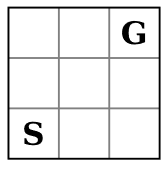

a. Implement **Q-learning** and **Double Q-learning** and apply them to this problem for 10,000 experiments using the learning rate $\alpha=\frac{1}{n(s,a)}$.

b. Plot the average reward per step vs. number of time steps averaged over 10,000 experiments. The length of an episode following the optimal policy is five actions, so the optimal average reward per step is +0.2. Plot this true value in your figure and see how close your algorithm gets to the true value.

c. Plot the maximal action value in the starting state $S$ (i.e. $max_a Q(s,a)$) averaged over 10,000 experiments. The optimal value of maximally valued action in the starting state is $5\gamma^4 - \sum_{k=0}^3 \approx 0.36$. Plot this true value in your figure and see how close your algorithm gets to the true value.

d. Repeat the experiments with $\alpha = \frac{1}{n(s,a)^{0.8}}$ and redo steps b and c.


**Note:** You should have four figures (average rewards and maximal action values for different learning rates, $2 \times 2$). 


In [ ]:
# Your code here

Answer the following questions:

a.	Which algorithm finds a better policy? Why?
> Answer 

b.	b.	Which learning rate performs better? 
> Answer